In [2]:
import pandas as pd
from matplotlib import pyplot as plt

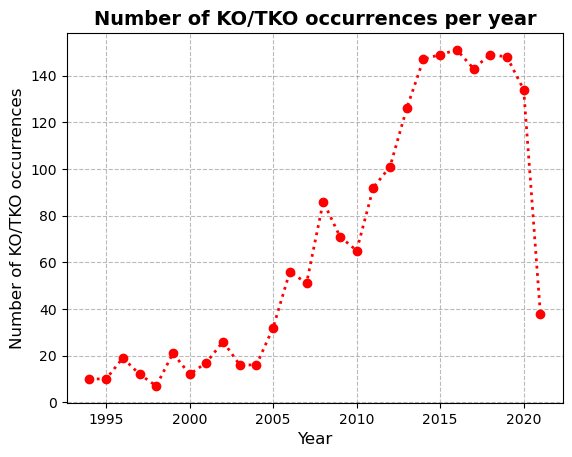

In [2]:
# How does KO/TKO numbers evolve?
# numbers are affected by higher numbers of events through the years

# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Select the rows with the specified win_by value
win_by = 'KO/TKO'
filtered_df = df[df['win_by'] == win_by]

# Group the data by the 'year' column and count the number of occurrences of each value
counts = filtered_df.groupby('year')['win_by'].count()

# Plot the data as a line chart
plt.plot(counts.index, counts.values, color='red', linestyle='dotted', marker='o', markersize=6, linewidth=2)

# Add a title and axis labels
plt.title('Number of KO/TKO occurrences per year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of KO/TKO occurrences', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()


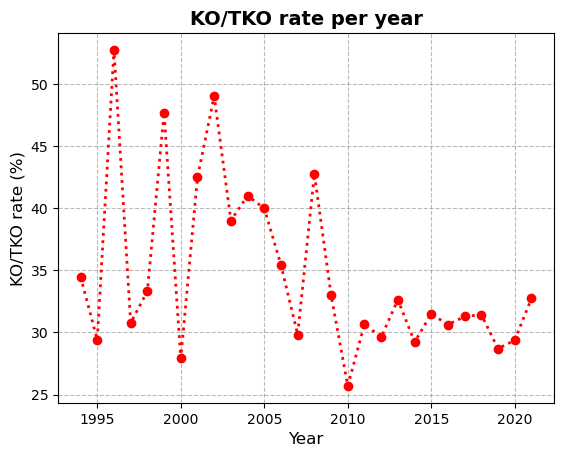

In [3]:
# Modified appropriately with the KO/TKO rate
# because there could be a different number of fights each year

# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' column and count the number of occurrences of each value
counts = df.groupby('year')['win_by'].count()

# Select the rows with the specified win_by value and group them by the 'year' column
win_by = 'KO/TKO'
filtered_df = df[df['win_by'] == win_by]
filtered_counts = filtered_df.groupby('year')['win_by'].count()

# Calculate the KO/TKO rate as the percentage of fights ended with KO/TKO in each year
ko_tko_rate = filtered_counts / counts * 100

# Plot the data as a line chart
plt.plot(ko_tko_rate.index, ko_tko_rate.values, color='red', linestyle='dotted', marker='o', markersize=6, linewidth=2)

# Add a title and axis labels
plt.title('KO/TKO rate per year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('KO/TKO rate (%)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()




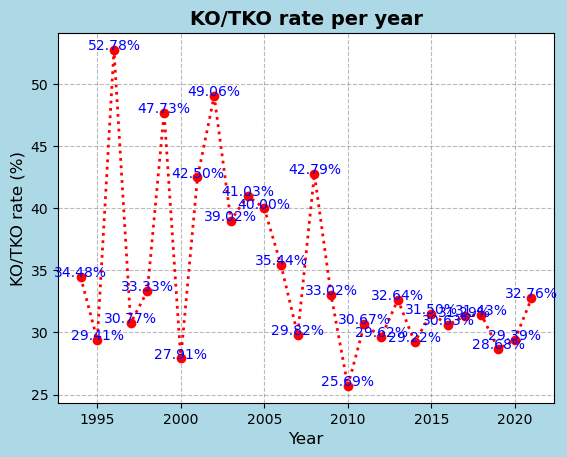

In [4]:
# visualisation modified with values in the graph
# Calculate the KO/TKO rate as the percentage of fights ended with KO/TKO in each year
ko_tko_rate = filtered_counts / counts * 100

# Plot the data as a line chart
plt.plot(ko_tko_rate.index, ko_tko_rate.values, color='red', linestyle='dotted', marker='o', markersize=6, linewidth=2)

# Add labels to the data points
for x, y in zip(ko_tko_rate.index, ko_tko_rate.values):
    plt.text(x, y, f'{y:.2f}%', fontsize=10, color='blue', ha='center')

# Add a title and axis labels
plt.title('KO/TKO rate per year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('KO/TKO rate (%)', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()


In [6]:
df.to_excel('ko_tko_rate.xlsx', sheet_name='KO_TKO rate', index=False)


Does this correlate with changing of fighting styles?

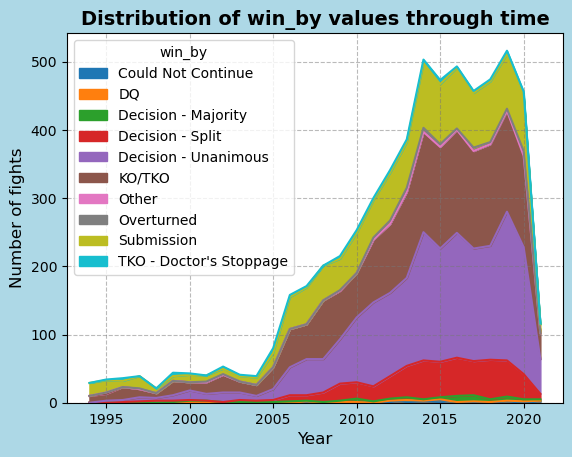

In [7]:
# Differences in win_by numbers through the years
# Differences are affected by absolute number of fights

# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'win_by' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'win_by']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each win_by value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='win_by', values='count')

# Plot the data as a stacked area chart
pivoted_counts.plot.area(stacked=True)

# Add a title and axis labels
plt.title('Distribution of win_by values through time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of fights', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()


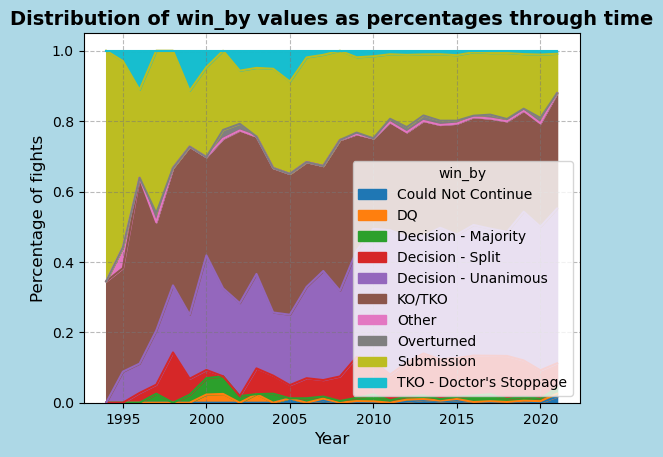

In [9]:
# Modification for each type of finish (win_by) and its overall percentage (concerning the number of fights in each year)

# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'win_by' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'win_by']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each win_by value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='win_by', values='count')

# Calculate the percentage of fights with each win_by value in each year
percentages = pivoted_counts.divide(pivoted_counts.sum(axis=1), axis=0)

# Plot the data as a stacked area chart
percentages.plot.area(stacked=True)

# Add a title and axis labels
plt.title('Distribution of win_by values as percentages through time', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage of fights', fontsize=12)

# Add grid lines
plt.grid(True, linestyle='--', color='#777777', alpha=0.5)

# Set the background color
plt.rcParams['figure.facecolor'] = 'lightblue'

# Show the plot
plt.show()



In [12]:
#creating a table of counts
counts.to_excel("win_by_counts.xlsx", index=False, sheet_name="Sheet1")

Data could correlate with the dominance of ground game (e.g. Royce Gracie) in the early years of UFC


In [10]:
# creating a table concerning the percentage of win_by types

# modification with percentage

# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'win_by' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'win_by']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each win_by value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='win_by', values='count')

# Calculate the percentage of fights with each win_by value in each year, out of the total number of fights in each year
percentages = pivoted_counts.divide(pivoted_counts.sum(axis=1), axis=0)

# Multiply the percentage values by 100 and format them as percentages
formatted_percentages = percentages.applymap(lambda x: "{:.1%}".format(x))

# Write the formatted percentage data to an Excel file
formatted_percentages.to_excel("win_by_percentages.xlsx", index=True, sheet_name="Sheet1", engine='openpyxl', float_format='%.1f%%')


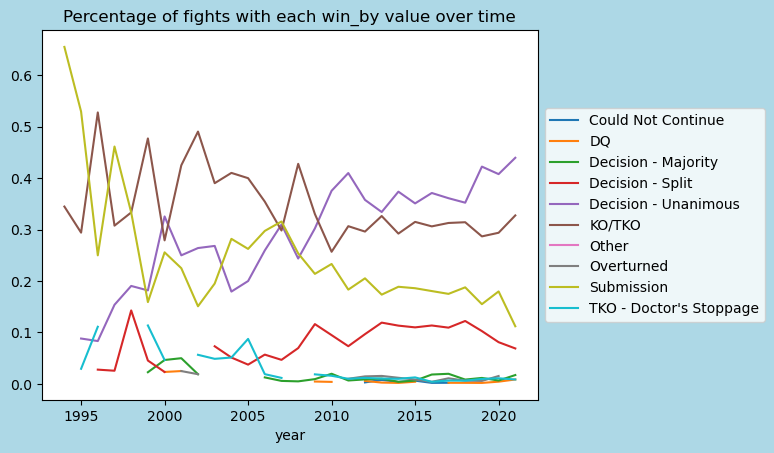

In [7]:
# additional visualisation
# Load the data into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'win_by' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'win_by']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each win_by value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='win_by', values='count')

# Calculate the percentage of fights with each win_by value in each year, out of the total number of fights in each year
percentages = pivoted_counts.divide(pivoted_counts.sum(axis=1), axis=0)

# Plot the percentage data as a line chart
percentages.plot(kind='line', title='Percentage of fights with each win_by value over time')

# Add the legend next to the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# Show the plot
plt.show()


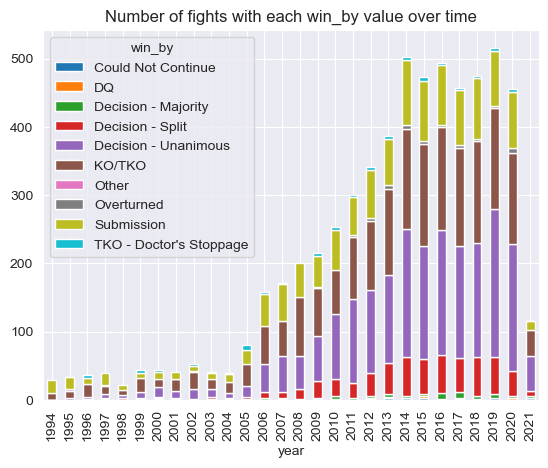

In [17]:
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'win_by' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'win_by']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each win_by value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='win_by', values='count')

# Plot the data as a multi-bar chart
pivoted_counts.plot(kind='bar', stacked=True, title='Number of fights with each win_by value over time')

# Show the plot
plt.show()


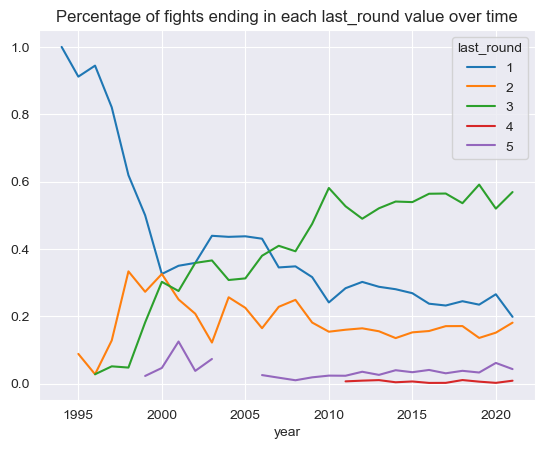

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'last_round' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'last_round']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each last_round value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='last_round', values='count')

# Calculate the percentage of fights in each last_round value in each year, out of the total number of fights in each year
percentages = pivoted_counts.divide(pivoted_counts.sum(axis=1), axis=0)

# Plot the percentage data as a line chart
percentages.plot(kind='line', title='Percentage of fights ending in each last_round value over time')

# Show the plot
plt.show()

# Save the table to an Excel file
percentages.to_excel('percentages_table.xlsx')




In [18]:
# Import the pandas library
import pandas as pd

# Read the data from the Excel file
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Create a pivot table with the 'year' column as the index and the 'win_by' column as the columns
table = pd.pivot_table(df, index='year', columns='win_by', values='R_fighter', aggfunc='count')

# Save the pivot table to an Excel file
table.to_excel('win_by_through_years.xlsx')


<Figure size 1200x600 with 0 Axes>

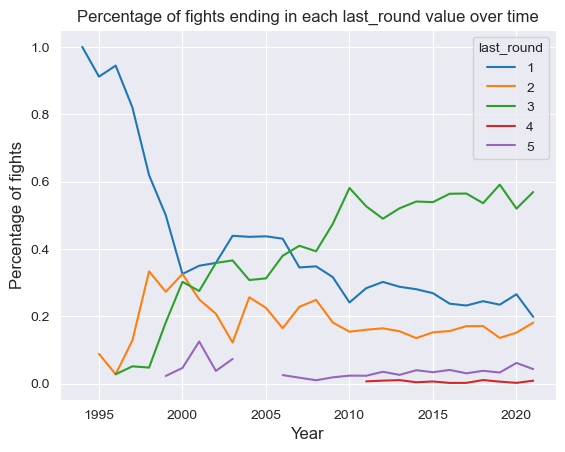

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'last_round' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'last_round']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each last_round value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='last_round', values='count')

# Calculate the percentage of fights in each last_round value in each year, out of the total number of fights in each year
percentages = pivoted_counts.divide(pivoted_counts.sum(axis=1), axis=0)

# Create a figure with a wider width
plt.figure(figsize=(12, 6))

# Plot the percentage data as a line chart
percentages.plot(kind='line', title='Percentage of fights ending in each last_round value over time')

# Set the font size for the x-axis labels
plt.xlabel('Year', fontsize=12)

# Set the font size for the y-axis labels
plt.ylabel('Percentage of fights', fontsize=12)

# Show the plot
plt.show()


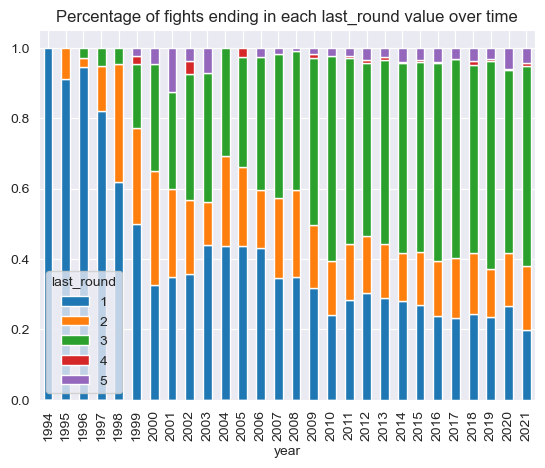

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'last_round' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'last_round']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each last_round value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='last_round', values='count')

# Calculate the percentage of fights in each last_round value in each year, out of the total number of fights in each year
percentages = pivoted_counts.divide(pivoted_counts.sum(axis=1), axis=0)

# Plot the percentage data as a stacked bar chart
percentages.plot.bar(stacked=True, title='Percentage of fights ending in each last_round value over time')

# Show the plot
plt.show()


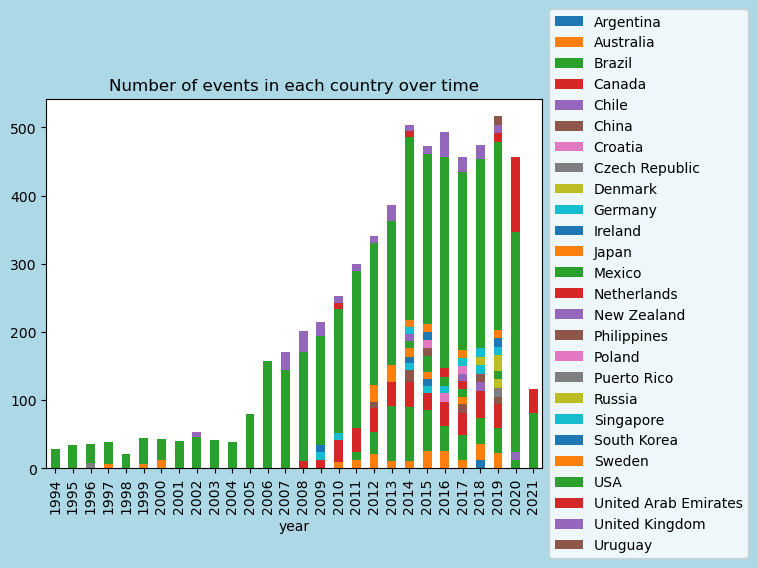

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Create a new 'country' column by extracting the country name from the 'location' column
df['country'] = df['location'].apply(lambda x: x.split(',')[-1].strip())

# Group the data by the 'year' and 'country' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'country']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each country and a row for each year
pivoted_counts = counts.pivot(index='year', columns='country', values='count')

# Plot the data as a bar chart
pivoted_counts.plot(kind='bar', stacked=True, title='Number of events in each country over time')

# Add the legend next to the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()


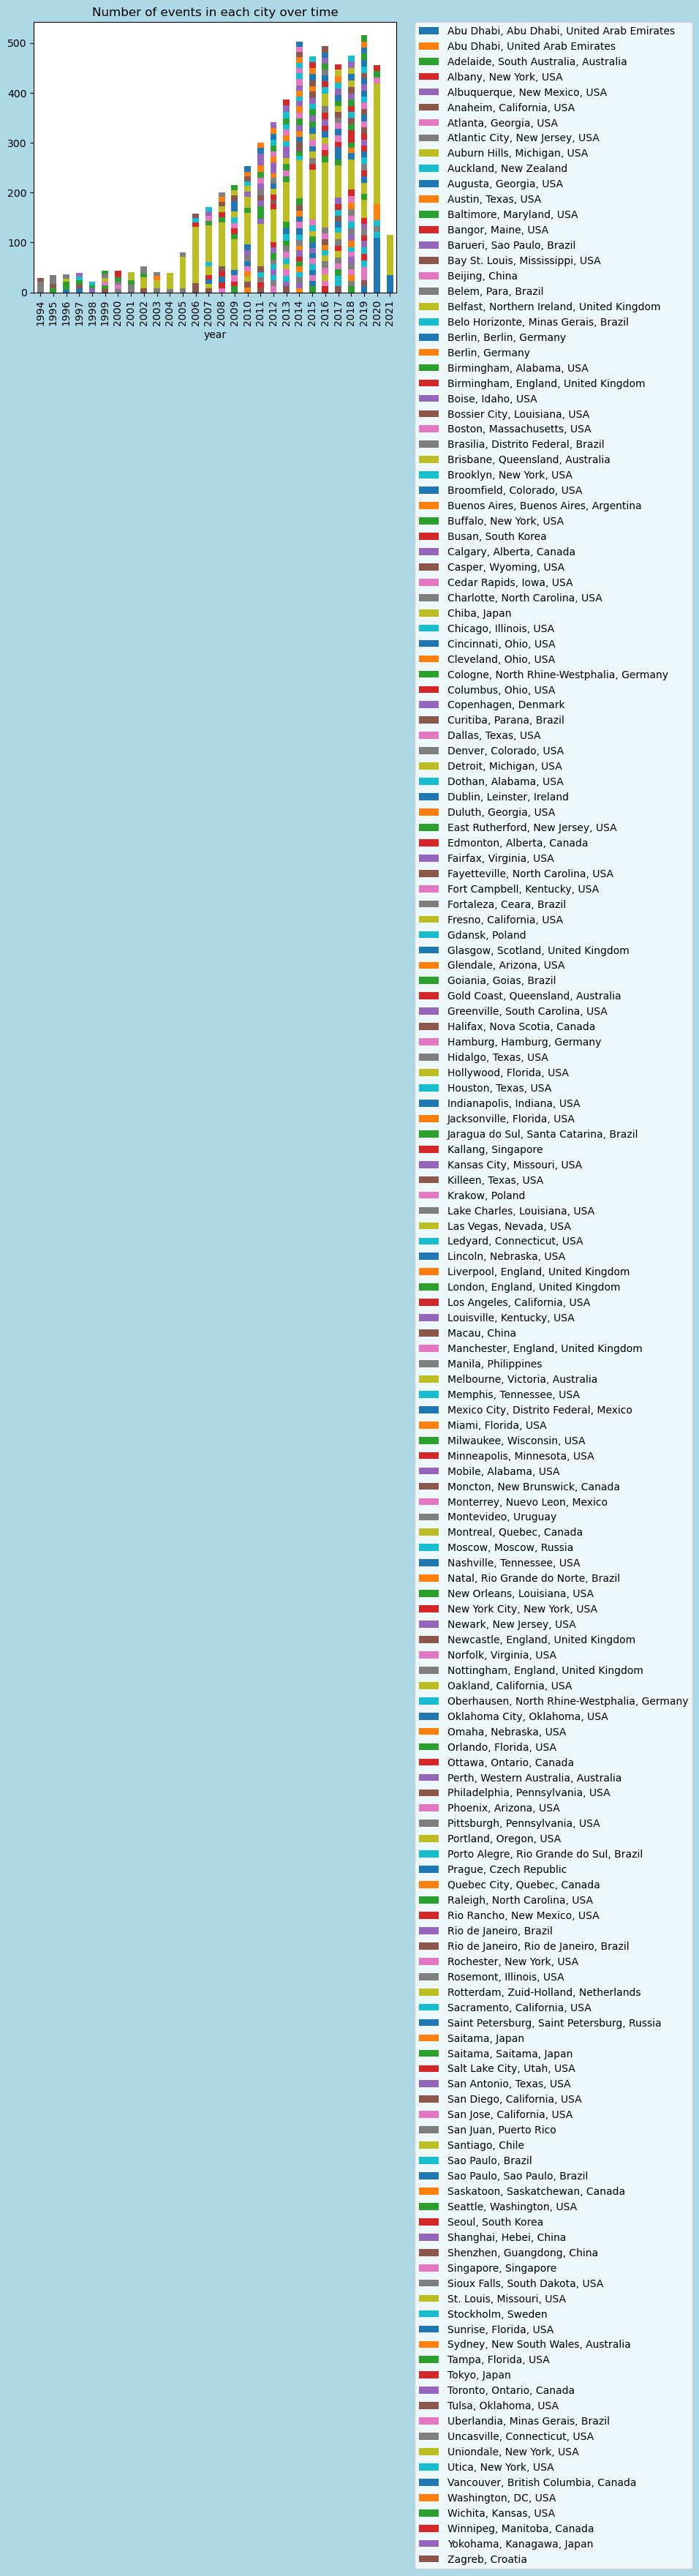

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Group the data by the 'year' and 'location' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'location']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each location value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='location', values='count')

# Plot the pivoted data as a bar chart
pivoted_counts.plot(kind='bar', stacked=True, title='Number of events in each city over time')

# Place the legend next to the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


# Show the plot
plt.show()


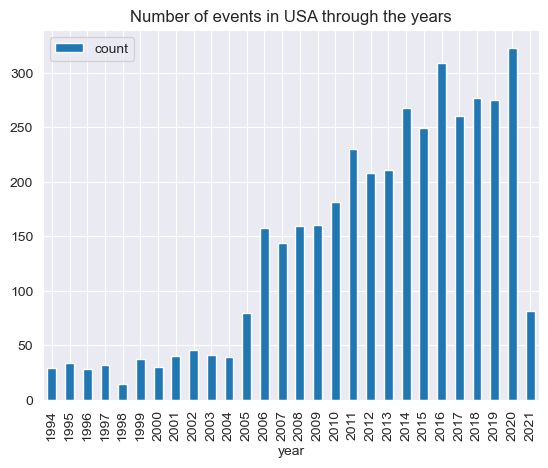

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Prompt the user to enter a location
location = input("Enter a location to filter the data by (e.g. 'USA', 'England'): ")

# Filter the data to only include events in the specified location
filtered_df = df[df['location'].str.contains(location)]

# Group the filtered data by the 'year' column and count the number of occurrences of each year
counts = filtered_df.groupby('year').size().reset_index(name='count')

# Plot the counts data as a bar chart
counts.plot(x='year', y='count', kind='bar', title=f'Number of events in {location} through the years')

# Show the plot
plt.show()


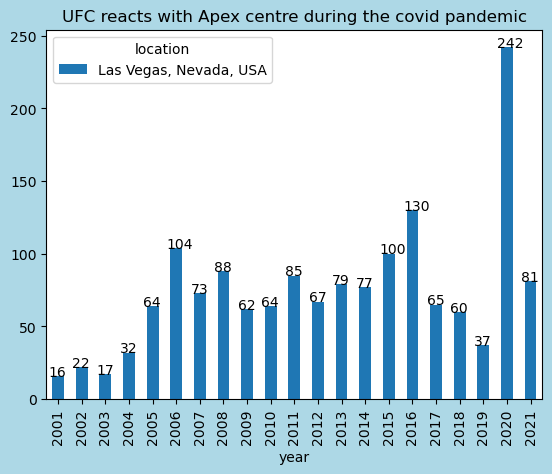

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Prompt the user to enter a city
city = input('Enter a city: ')

# Filter the data to include only events in the specified city
df = df[df['location'].str.contains(city)]

# Group the data by the 'year' and 'location' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'location']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each location value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='location', values='count')

# Plot the pivot table as a bar chart
pivoted_counts.plot(kind='bar', title='UFC reacts with Apex centre during the covid pandemic')

# Add the counts above each bar
for i, v in enumerate(pivoted_counts.values.flatten()):
    plt.text(i - 0.4, v + 0.1, str(v))

# Show the plot
plt.show()


This solution doesn't do well with multiple inputs

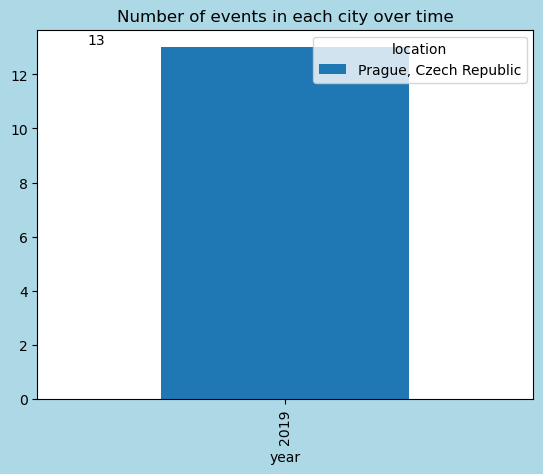

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#
# Read the data from the Excel file into a Pandas DataFrame
df = pd.read_excel('basic_data.xlsx')

# Convert the 'date' column to a datetime column
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column and create a new 'year' column
df['year'] = df['date'].dt.year

# Prompt the user to enter a city or state
locations = input('Enter a city or state (separated by commas if multiple): ')

# Split the locations string into a list of individual locations
location_list = locations.split(',')

# Remove leading and trailing white space from each location
location_list = [location.strip() for location in location_list]

# Filter the data to include only events in the specified locations
for location in location_list:
    df = df[df['location'].str.contains(location)]

# Group the data by the 'year' and 'location' columns and count the number of occurrences of each value
counts = df.groupby(['year', 'location']).size().reset_index(name='count')

# Pivot the data to create a new DataFrame with a column for each location value and a row for each year
pivoted_counts = counts.pivot(index='year', columns='location', values='count')

# Plot the pivot table as a bar chart
pivoted_counts.plot(kind='bar', title='Number of events in each city over time')

# Add the counts above each bar
for i, v in enumerate(pivoted_counts.values.flatten()):
    if np.isfinite(v):
        plt.text(i - 0.4, v + 0.1, str(v))

#Save the plot as an image file
#plt.savefig('events_by_location.png')

#Save the pivot table as an Excel file
#pivoted_counts.to_excel('events_by_location_table.xlsx')
# Show the plot
plt.show()
